# Allen Brain Atlas Adult Human Brain (RNA-Sequencing)

Author: Moshe Silverstein <br/>
Date: 5-17 <br/>
Data Source: http://human.brain-map.org/static/download

Reviewer: Charles Dai <br>
Updated: 6-20

In [1]:
#%%appyter init
from appyter import magic
magic.init(lambda _ = globals: _())

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
import sys, datetime
import os
import shutil

import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
%matplotlib inline

import utility_functions as uf
import lookup

In [3]:
#from clustergrammer_widget import *
#net = Network(clustergrammer_widget)

In [4]:
importlib.reload(uf)

<module 'utility_functions' from '/home/charlesdai/Projects/Harmonizome-Data-Processing-Appyters/ABA-RNAseq/utility_functions.py'>

### Versions Of Modules In Use

In [5]:
sys.version

'3.8.0 (default, Oct 28 2019, 16:14:01) \n[GCC 8.3.0]'

# Functions

### Pre-process Data

In [6]:
def mapSampleData(inputDF, sampleMetaDF, Ontology):
    lst = []
    for index in sampleMetaDF.index:
        structure = sampleMetaDF.loc[index, 'ontology_structure_id']
        hemisphere = sampleMetaDF.loc[index, 'hemisphere']
        if type(Ontology.loc[structure, 'name']) == str:
            lst.append(str(Ontology.loc[structure, 'name']))
        else:
            for struc in Ontology.loc[structure, ['name', 'hemisphere']].values:
                if struc[1] == hemisphere:
                    lst.append(str(struc[0]))
    inputDF.columns  = lst

### 

### Load Mapping Dictionaries

In [7]:
symbol_lookup, geneid_lookup = lookup.get_lookups()

Gathering sources: 100%|██████████| 3/3 [00:08<00:00,  2.96s/it]


### Output Path

In [8]:
path = 'Output/ABA'
if not os.path.exists(path):
    os.makedirs(path)

In [9]:
%%appyter hide_code
{% do SectionField(
    name = 'donor9861',
    title = 'Donor 9861 Data',
    subtitle = 'Upload files from Donor 9861.',
) %}

{% do SectionField(
    name = 'donor10021',
    title = 'Donor 10021 Data',
    subtitle = 'Upload files from Donor 10021.',
) %}

# Load Data

## Donor 9861

In [10]:
%%appyter code_exec

matrix_9861 = pd.read_csv({{FileField(
    constraint='.*\\.csv$',
    name='donor9861-RNAseqCounts', 
    label='RNAseq Counts', 
    default='Input/rnaseq_donor9861/RNAseqCounts.csv',
    section='donor9861')
}}, sep=',', header=None, index_col=0)

```python

matrix_9861 = pd.read_csv('Input/rnaseq_donor9861/RNAseqCounts.csv', sep=',', header=None, index_col=0)
```

In [11]:
matrix_9861.head()

,1,2,3,4,5,6,7,8,9,10,...,112,113,114,115,116,117,118,119,120,121
0,,,,,,,,,,,,,,,,,,,,,
A1BG,50.72,73.58,43.15,35.03,67.32,54.00,62.43,51.94,16.43,67.67,...,38.00,52.59,53.89,48.86,81.00,64.00,226.74,128.86,214.95,95.85
A1BG-AS1,101.17,136.09,84.37,55.95,90.35,26.51,98.79,69.80,24.87,65.49,...,102.45,81.88,92.86,86.10,36.33,44.25,40.36,24.97,14.68,20.69
A1CF,3.13,3.01,5.88,1.00,4.73,2.00,1.02,0.00,0.00,2.00,...,9.94,8.84,7.94,9.31,3.00,0.00,1.99,5.00,1.01,1.99
A2LD1,26.84,66.72,49.18,24.41,37.27,35.56,39.78,22.90,10.47,30.84,...,30.81,28.07,25.69,15.37,39.57,44.70,83.19,86.93,61.43,70.41
A2M,1871.00,3411.51,2728.97,948.97,3011.94,2361.58,2359.99,3300.98,1676.99,2781.99,...,1812.89,2628.93,1573.98,1935.88,4892.97,4506.99,6336.45,6727.81,5459.27,8036.99


In [12]:
matrix_9861.shape

(22318, 121)

### Load Sample Metadata

In [13]:
%%appyter code_exec

sample_meta_9861 = pd.read_csv({{FileField(
    constraint='.*\\.csv$',
    name='donor9861-SampleAnnot', 
    label='Sample Annotations', 
    default='Input/rnaseq_donor9861/SampleAnnot.csv',
    section='donor9861')
}}, sep=',')

```python

sample_meta_9861 = pd.read_csv('Input/rnaseq_donor9861/SampleAnnot.csv', sep=',')
```

In [14]:
sample_meta_9861.head()

,RNAseq_sample_name,replicate_sample,sample_name,well_id,microarray_run_id,ontology_color,main_structure,sub_structure,ontology_structure_id,ontology_structure_acronym,...,brain,million_clusters,clip_percentage,RIN_RNA_quality,rnaseq_run_id,A.Pct,C.Pct,G.Pct,T.Pct,N.Pct
0,S010002_L7.LB16,No,S010002,105,275-104,#FF7B62,PL,SPL,4101,SPL-s,...,1,36.467,6.56,8.0,H15699,25.41,25.22,24.15,25.21,0.01
1,S010003_L7.LB19,No,S010003,113,275-104,#FF7B62,PL,SPL,4101,SPL-s,...,1,52.991,24.45,7.5,V00091,20.87,7.14,26.30,24.34,23.40
2,S010006_L8.LB27,No,S010006,193,275-104,#FF7B62,PL,SPL,4099,SPL-i,...,1,37.405,4.23,7.2,H15699,25.88,24.43,23.74,25.95,0.01
3,S010007_L4.LB20,No,S010007,145,275-104,#FF5D62,PL,AnG-s,4113,AnG-s,...,1,29.974,21.40,6.0,H15699,26.29,25.52,24.35,23.84,0.01
4,S010017_L1.LB2,No,S010017,114,275-104,#E8D959,FL,SFG-l,4027,SFG-l,...,1,34.290,2.26,7.3,H16345,24.97,24.95,24.71,25.36,0.01


In [15]:
sample_meta_9861.shape

(121, 21)

### Load Sample Ontology

In [16]:
%%appyter code_exec

sample_onto_9861 = pd.read_csv({{FileField(
    constraint='.*\\.csv$',
    name='donor9861-Ontology', 
    label='Ontology', 
    default='Input/rnaseq_donor9861/Ontology.csv',
    section='donor9861')
}}, sep=',', index_col=0)

```python

sample_onto_9861 = pd.read_csv('Input/rnaseq_donor9861/Ontology.csv', sep=',', index_col=0)
```

In [17]:
sample_onto_9861.head()

,acronym,name,parent_structure_id,hemisphere,graph_order,structure_id_path,color_hex_triplet
id,,,,,,,
4005,Br,brain,NaN,NaN,0,/4005/,A0A0A0
4006,GM,gray matter,4005.0,NaN,1,/4005/4006/,787878
4007,Tel,telencephalon,4006.0,NaN,2,/4005/4006/4007/,D988A3
4008,Cx,cerebral cortex,4007.0,NaN,3,/4005/4006/4007/4008/,EDA65F
4009,FL,frontal lobe,4008.0,NaN,4,/4005/4006/4007/4008/4009/,E8CD59


In [18]:
sample_onto_9861.shape

(1839, 7)

### Map Sample Metadata to Sample ID

In [19]:
mapSampleData(matrix_9861, sample_meta_9861, sample_onto_9861)

In [20]:
matrix_9861.head()

,"superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, left, inferior bank of gyrus","angular gyrus, left, superior bank of gyrus","superior frontal gyrus, right, lateral bank of gyrus","lateral orbital gyrus, right","gyrus rectus, left","medial orbital gyrus, left","medial orbital gyrus, left","gyrus rectus, left",...,"Crus I, right, lateral hemisphere","IX, right, paravermis","VIIIA, left, lateral hemisphere","VI, left, lateral hemisphere","head of caudate nucleus, right","putamen, right","putamen, right","globus pallidus, external segment, right","globus pallidus, external segment, left","body of caudate nucleus, left"
0,,,,,,,,,,,,,,,,,,,,,
A1BG,50.72,73.58,43.15,35.03,67.32,54.00,62.43,51.94,16.43,67.67,...,38.00,52.59,53.89,48.86,81.00,64.00,226.74,128.86,214.95,95.85
A1BG-AS1,101.17,136.09,84.37,55.95,90.35,26.51,98.79,69.80,24.87,65.49,...,102.45,81.88,92.86,86.10,36.33,44.25,40.36,24.97,14.68,20.69
A1CF,3.13,3.01,5.88,1.00,4.73,2.00,1.02,0.00,0.00,2.00,...,9.94,8.84,7.94,9.31,3.00,0.00,1.99,5.00,1.01,1.99
A2LD1,26.84,66.72,49.18,24.41,37.27,35.56,39.78,22.90,10.47,30.84,...,30.81,28.07,25.69,15.37,39.57,44.70,83.19,86.93,61.43,70.41
A2M,1871.00,3411.51,2728.97,948.97,3011.94,2361.58,2359.99,3300.98,1676.99,2781.99,...,1812.89,2628.93,1573.98,1935.88,4892.97,4506.99,6336.45,6727.81,5459.27,8036.99


## Donor 10021

In [21]:
%%appyter code_exec

matrix_10021 = pd.read_csv({{FileField(
    constraint='.*\\.csv$',
    name='donor10021-RNAseqCounts', 
    label='RNAseq Counts', 
    default='Input/rnaseq_donor10021/RNAseqCounts-2.csv',
    section='donor10021')
}}, sep=',', header=None, index_col=0)

```python

matrix_10021 = pd.read_csv('Input/rnaseq_donor10021/RNAseqCounts-2.csv', sep=',', header=None, index_col=0)
```

In [22]:
matrix_10021.head()

,1,2,3,4,5,6,7,8,9,10,...,112,113,114,115,116,117,118,119,120,121
0,,,,,,,,,,,,,,,,,,,,,
A1BG,84.92,143.85,88.59,110.00,87.07,122.25,103.65,106.91,191.16,162.56,...,130.22,104.00,180.62,142.79,119.41,97.89,93.25,103.48,83.31,106.13
A1BG-AS1,107.12,108.52,96.26,96.43,98.79,91.09,110.81,140.31,198.17,156.49,...,101.59,47.58,33.40,29.81,96.52,66.92,60.54,98.29,73.54,89.30
A1CF,13.25,5.09,4.58,4.03,1.00,3.00,2.99,1.00,7.00,4.25,...,2.00,1.00,2.98,1.00,6.09,10.78,11.27,10.98,9.02,13.11
A2LD1,53.26,72.54,54.20,49.50,46.60,54.83,48.51,68.45,84.89,50.57,...,88.49,63.68,114.16,93.55,57.49,65.92,70.96,60.60,26.51,55.53
A2M,3813.83,3582.94,3907.99,3892.90,3592.06,4742.55,3811.88,5890.89,5856.88,4077.96,...,4095.95,5089.97,9421.94,8253.94,4383.91,2654.71,3267.99,3421.37,2213.87,2540.99


In [23]:
matrix_10021.shape

(22318, 121)

### Load Sample Metadata

In [24]:
%%appyter code_exec

sample_meta_10021 = pd.read_csv({{FileField(
    constraint='.*\\.csv$',
    name='donor10021-SampleAnnot', 
    label='Sample Annotations', 
    default='Input/rnaseq_donor10021/SampleAnnot-2.csv',
    section='donor10021')
}}, sep=',')

```python

sample_meta_10021 = pd.read_csv('Input/rnaseq_donor10021/SampleAnnot-2.csv', sep=',')
```

In [25]:
sample_meta_10021.head()

,RNAseq_sample_name,replicate_sample,sample_name,well_id,microarray_run_id,ontology_color,main_structure,sub_structure,ontology_structure_id,ontology_structure_acronym,...,brain,million_clusters,clip_percentage,RIN_RNA_quality,rnaseq_run_id,A.Pct,C.Pct,G.Pct,T.Pct,N.Pct
0,S020008_L7.LB13,No,S020008,4569,275-201,#E8D959,FL,SFG-l,4024,SFG-l,...,2,33.696,1.86,8.6,H15601,25.38,24.74,24.20,25.68,0.00
1,S020013_L7.LB3,No,S020013,4514,275-201,#E8D959,FL,SFG-m,4026,SFG-m,...,2,36.747,6.03,8.3,H15967,25.66,24.65,23.89,25.80,0.01
2,S020019_L2.LB9,No,S020019,4562,275-201,#E8D959,FL,SFG-l,4024,SFG-l,...,2,33.115,2.33,8.6,H15602,25.54,24.69,23.89,25.88,0.01
3,S020024_L8.LB22,No,S020024,4602,275-205,#E8C659,FL,orIFG,4045,orIFG,...,2,35.500,2.51,8.2,H15601,25.54,24.63,23.99,25.83,0.00
4,S020027_L6.LB6,No,S020027,4531,275-201,#E8C659,FL,orIFG,4046,orIFG,...,2,30.290,1.44,8.0,H15602,25.28,24.85,24.13,25.74,0.00


In [26]:
sample_meta_10021.shape

(121, 21)

### Load Sample Ontology

In [27]:
%%appyter code_exec

sample_onto_10021 = pd.read_csv({{FileField(
    constraint='.*\\.csv$',
    name='donor10021-Ontology', 
    label='Ontology', 
    default='Input/rnaseq_donor10021/Ontology-2.csv',
    section='donor10021')
}}, sep=',', index_col=0)

```python

sample_onto_10021 = pd.read_csv('Input/rnaseq_donor10021/Ontology-2.csv', sep=',', index_col=0)
```

In [28]:
sample_onto_10021.head()

,acronym,name,parent_structure_id,hemisphere,graph_order,structure_id_path,color_hex_triplet
id,,,,,,,
4005,Br,brain,NaN,NaN,0,/4005/,A0A0A0
4006,GM,gray matter,4005.0,NaN,1,/4005/4006/,787878
4007,Tel,telencephalon,4006.0,NaN,2,/4005/4006/4007/,D988A3
4008,Cx,cerebral cortex,4007.0,NaN,3,/4005/4006/4007/4008/,EDA65F
4009,FL,frontal lobe,4008.0,NaN,4,/4005/4006/4007/4008/4009/,E8CD59


In [29]:
sample_onto_10021.shape

(1839, 7)

### Map Sample Metadata to Sample ID

In [30]:
mapSampleData(matrix_10021, sample_meta_10021, sample_onto_10021)

In [31]:
matrix_10021.head()

,"superior frontal gyrus, left, lateral bank of gyrus","superior frontal gyrus, right, medial bank of gyrus","superior frontal gyrus, left, lateral bank of gyrus","inferior frontal gyrus, orbital part, left","inferior frontal gyrus, orbital part, right","medial orbital gyrus, left","medial orbital gyrus, right","middle frontal gyrus, right, inferior bank of gyrus","middle frontal gyrus, right, superior bank of gyrus","superior frontal gyrus, right, lateral bank of gyrus",...,"fusiform gyrus, left, bank of the its","parahippocampal gyrus, left, lateral bank of gyrus","globus pallidus, internal segment, left","globus pallidus, external segment, right","parahippocampal gyrus, right, bank of the cos","VIIIA, right, lateral hemisphere","IV, right, paravermis","IV, right, paravermis","VIIB, left, paravermis","Crus II, left, lateral hemisphere"
0,,,,,,,,,,,,,,,,,,,,,
A1BG,84.92,143.85,88.59,110.00,87.07,122.25,103.65,106.91,191.16,162.56,...,130.22,104.00,180.62,142.79,119.41,97.89,93.25,103.48,83.31,106.13
A1BG-AS1,107.12,108.52,96.26,96.43,98.79,91.09,110.81,140.31,198.17,156.49,...,101.59,47.58,33.40,29.81,96.52,66.92,60.54,98.29,73.54,89.30
A1CF,13.25,5.09,4.58,4.03,1.00,3.00,2.99,1.00,7.00,4.25,...,2.00,1.00,2.98,1.00,6.09,10.78,11.27,10.98,9.02,13.11
A2LD1,53.26,72.54,54.20,49.50,46.60,54.83,48.51,68.45,84.89,50.57,...,88.49,63.68,114.16,93.55,57.49,65.92,70.96,60.60,26.51,55.53
A2M,3813.83,3582.94,3907.99,3892.90,3592.06,4742.55,3811.88,5890.89,5856.88,4077.96,...,4095.95,5089.97,9421.94,8253.94,4383.91,2654.71,3267.99,3421.37,2213.87,2540.99


## Combine Donor Datasets

## Unfiltered

In [32]:
matrix = pd.concat([matrix_9861, matrix_10021], axis=1)

In [33]:
matrix.head()

,"superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, left, inferior bank of gyrus","angular gyrus, left, superior bank of gyrus","superior frontal gyrus, right, lateral bank of gyrus","lateral orbital gyrus, right","gyrus rectus, left","medial orbital gyrus, left","medial orbital gyrus, left","gyrus rectus, left",...,"fusiform gyrus, left, bank of the its","parahippocampal gyrus, left, lateral bank of gyrus","globus pallidus, internal segment, left","globus pallidus, external segment, right","parahippocampal gyrus, right, bank of the cos","VIIIA, right, lateral hemisphere","IV, right, paravermis","IV, right, paravermis","VIIB, left, paravermis","Crus II, left, lateral hemisphere"
0,,,,,,,,,,,,,,,,,,,,,
A1BG,50.72,73.58,43.15,35.03,67.32,54.00,62.43,51.94,16.43,67.67,...,130.22,104.00,180.62,142.79,119.41,97.89,93.25,103.48,83.31,106.13
A1BG-AS1,101.17,136.09,84.37,55.95,90.35,26.51,98.79,69.80,24.87,65.49,...,101.59,47.58,33.40,29.81,96.52,66.92,60.54,98.29,73.54,89.30
A1CF,3.13,3.01,5.88,1.00,4.73,2.00,1.02,0.00,0.00,2.00,...,2.00,1.00,2.98,1.00,6.09,10.78,11.27,10.98,9.02,13.11
A2LD1,26.84,66.72,49.18,24.41,37.27,35.56,39.78,22.90,10.47,30.84,...,88.49,63.68,114.16,93.55,57.49,65.92,70.96,60.60,26.51,55.53
A2M,1871.00,3411.51,2728.97,948.97,3011.94,2361.58,2359.99,3300.98,1676.99,2781.99,...,4095.95,5089.97,9421.94,8253.94,4383.91,2654.71,3267.99,3421.37,2213.87,2540.99


In [34]:
matrix.shape

(22318, 242)

### Save Unfiltered to file

In [35]:
uf.saveData(matrix, path, 'aba_brain_matrix_unfiltered', ext='tsv', compression='gzip')

## Filtered

In [36]:
normalized_matrix = pd.concat([matrix_9861, matrix_10021], axis=1)

In [37]:
normalized_matrix.head()

,"superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, left, inferior bank of gyrus","angular gyrus, left, superior bank of gyrus","superior frontal gyrus, right, lateral bank of gyrus","lateral orbital gyrus, right","gyrus rectus, left","medial orbital gyrus, left","medial orbital gyrus, left","gyrus rectus, left",...,"fusiform gyrus, left, bank of the its","parahippocampal gyrus, left, lateral bank of gyrus","globus pallidus, internal segment, left","globus pallidus, external segment, right","parahippocampal gyrus, right, bank of the cos","VIIIA, right, lateral hemisphere","IV, right, paravermis","IV, right, paravermis","VIIB, left, paravermis","Crus II, left, lateral hemisphere"
0,,,,,,,,,,,,,,,,,,,,,
A1BG,50.72,73.58,43.15,35.03,67.32,54.00,62.43,51.94,16.43,67.67,...,130.22,104.00,180.62,142.79,119.41,97.89,93.25,103.48,83.31,106.13
A1BG-AS1,101.17,136.09,84.37,55.95,90.35,26.51,98.79,69.80,24.87,65.49,...,101.59,47.58,33.40,29.81,96.52,66.92,60.54,98.29,73.54,89.30
A1CF,3.13,3.01,5.88,1.00,4.73,2.00,1.02,0.00,0.00,2.00,...,2.00,1.00,2.98,1.00,6.09,10.78,11.27,10.98,9.02,13.11
A2LD1,26.84,66.72,49.18,24.41,37.27,35.56,39.78,22.90,10.47,30.84,...,88.49,63.68,114.16,93.55,57.49,65.92,70.96,60.60,26.51,55.53
A2M,1871.00,3411.51,2728.97,948.97,3011.94,2361.58,2359.99,3300.98,1676.99,2781.99,...,4095.95,5089.97,9421.94,8253.94,4383.91,2654.71,3267.99,3421.37,2213.87,2540.99


In [38]:
normalized_matrix.shape

(22318, 242)

# Process Data

## Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [39]:
normalized_matrix = uf.removeAndImpute(normalized_matrix)

In [40]:
normalized_matrix.head()

,"superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, right, superior bank of gyrus","superior parietal lobule, left, inferior bank of gyrus","angular gyrus, left, superior bank of gyrus","superior frontal gyrus, right, lateral bank of gyrus","lateral orbital gyrus, right","gyrus rectus, left","medial orbital gyrus, left","medial orbital gyrus, left","gyrus rectus, left",...,"fusiform gyrus, left, bank of the its","parahippocampal gyrus, left, lateral bank of gyrus","globus pallidus, internal segment, left","globus pallidus, external segment, right","parahippocampal gyrus, right, bank of the cos","VIIIA, right, lateral hemisphere","IV, right, paravermis","IV, right, paravermis","VIIB, left, paravermis","Crus II, left, lateral hemisphere"
0,,,,,,,,,,,,,,,,,,,,,
A1BG,50.72,73.58,43.15,35.03,67.32,54.00,62.43,51.940000,16.430000,67.67,...,130.22,104.00,180.62,142.79,119.41,97.89,93.25,103.48,83.31,106.13
A1BG-AS1,101.17,136.09,84.37,55.95,90.35,26.51,98.79,69.800000,24.870000,65.49,...,101.59,47.58,33.40,29.81,96.52,66.92,60.54,98.29,73.54,89.30
A1CF,3.13,3.01,5.88,1.00,4.73,2.00,1.02,3.938276,3.938276,2.00,...,2.00,1.00,2.98,1.00,6.09,10.78,11.27,10.98,9.02,13.11
A2LD1,26.84,66.72,49.18,24.41,37.27,35.56,39.78,22.900000,10.470000,30.84,...,88.49,63.68,114.16,93.55,57.49,65.92,70.96,60.60,26.51,55.53
A2M,1871.00,3411.51,2728.97,948.97,3011.94,2361.58,2359.99,3300.980000,1676.990000,2781.99,...,4095.95,5089.97,9421.94,8253.94,4383.91,2654.71,3267.99,3421.37,2213.87,2540.99


In [41]:
normalized_matrix.shape

(19867, 242)

## Map Gene Symbols To Up-to-date Approved Gene Symbols

In [42]:
normalized_matrix = uf.mapgenesymbols(normalized_matrix, symbol_lookup)

100%|██████████| 19867/19867 [00:00<00:00, 462824.09it/s]


In [43]:
normalized_matrix.shape

(19053, 242)

### Merge Duplicate Genes By Rows

In [44]:
normalized_matrix = uf.merge(normalized_matrix, 'row', 'mean')

In [45]:
normalized_matrix.shape

(18504, 242)

### Merge Like Column (by taking the mean)

In [46]:
normalized_matrix = uf.merge(normalized_matrix, 'column', 'mean')

In [47]:
normalized_matrix.shape

(18504, 100)

## Log2 Transform

In [48]:
normalized_matrix = uf.log2(normalized_matrix)

In [49]:
normalized_matrix.head()

,"Crus I, right, lateral hemisphere","Crus II, left, lateral hemisphere","IV, right, paravermis","IX, right, paravermis","VI, left, lateral hemisphere","VIIB, left, paravermis","VIIIA, left, lateral hemisphere","VIIIA, right, lateral hemisphere","angular gyrus, left, inferior bank of gyrus","angular gyrus, left, superior bank of gyrus",...,"superior frontal gyrus, right, medial bank of gyrus","superior parietal lobule, left, inferior bank of gyrus","superior parietal lobule, left, superior bank of gyrus","superior parietal lobule, right, superior bank of gyrus","superior temporal gyrus, left, inferior bank of gyrus","superior temporal gyrus, left, lateral bank of gyrus","superior temporal gyrus, right, inferior bank of gyrus","superior temporal gyrus, right, lateral bank of gyrus","supramarginal gyrus, left, inferior bank of gyrus","supramarginal gyrus, right, inferior bank of gyrus"
0,,,,,,,,,,,,,,,,,,,,,
A1BG,5.285402,6.743219,6.634666,5.743892,5.639811,6.397632,5.778471,6.627753,6.448130,5.861025,...,6.683732,5.929318,6.749266,6.793584,6.495589,6.978882,6.681777,6.504461,6.936667,7.328585
A1BG-AS1,6.692790,6.496654,6.329393,6.372952,6.444601,6.219943,6.552439,6.085765,6.586715,6.358607,...,6.784340,6.520632,6.522621,6.840514,7.184578,6.798569,6.636383,7.291217,7.441181,7.523307
A1CF,3.451541,3.818646,3.599913,3.298658,3.365972,3.324811,3.160275,3.558268,2.116587,2.144046,...,2.219556,2.921563,2.587365,2.047538,2.590562,2.353323,1.951090,2.003602,2.777592,2.732269
A2M,10.824871,11.311743,11.708084,11.360809,10.919519,11.113006,10.621118,11.374882,11.639166,11.356708,...,11.940312,11.630100,11.526489,11.622379,12.117755,11.941833,11.787622,11.932912,11.999503,12.528059
A2ML1,2.998196,4.153805,3.724650,3.716991,4.029453,3.961623,4.098453,3.671293,5.887119,5.066089,...,5.894030,5.647315,5.034304,5.196528,6.029085,4.824259,5.541948,5.649041,5.844925,6.018979


## Normalize Matrix (Quantile Normalize the matrix for the columns)

In [50]:
normalized_matrix = uf.quantileNormalize(normalized_matrix)

In [51]:
normalized_matrix.head()

,"Crus I, right, lateral hemisphere","Crus II, left, lateral hemisphere","IV, right, paravermis","IX, right, paravermis","VI, left, lateral hemisphere","VIIB, left, paravermis","VIIIA, left, lateral hemisphere","VIIIA, right, lateral hemisphere","angular gyrus, left, inferior bank of gyrus","angular gyrus, left, superior bank of gyrus",...,"superior frontal gyrus, right, medial bank of gyrus","superior parietal lobule, left, inferior bank of gyrus","superior parietal lobule, left, superior bank of gyrus","superior parietal lobule, right, superior bank of gyrus","superior temporal gyrus, left, inferior bank of gyrus","superior temporal gyrus, left, lateral bank of gyrus","superior temporal gyrus, right, inferior bank of gyrus","superior temporal gyrus, right, lateral bank of gyrus","supramarginal gyrus, left, inferior bank of gyrus","supramarginal gyrus, right, inferior bank of gyrus"
0,,,,,,,,,,,,,,,,,,,,,
A1BG,5.815101,6.861966,6.604615,6.084846,6.015489,6.757774,6.296785,6.801089,6.461403,6.128060,...,6.514769,5.968638,6.849867,6.635171,6.223463,7.141865,6.673431,6.045810,6.602181,6.676702
A1BG-AS1,7.054103,6.652261,6.300048,6.633819,6.777026,6.607629,6.995367,6.278183,6.613928,6.645546,...,6.609514,6.561788,6.627570,6.677459,6.894866,6.950937,6.632408,6.829471,7.106727,6.870009
A1CF,3.926057,4.088441,3.655373,3.591581,3.774735,3.722478,3.666493,3.774735,2.159478,2.260056,...,2.137293,2.997126,2.825546,2.019470,2.434091,2.600077,1.960778,1.973096,2.505275,2.254097
A2M,10.980410,11.202454,11.492376,11.357769,11.029488,11.275144,10.754321,11.354454,11.601902,11.544488,...,11.738863,11.635086,11.560235,11.388038,11.807129,11.965342,11.726448,11.451718,11.612123,11.896023
A2ML1,3.392167,4.387089,3.773292,4.139430,4.457293,4.324458,4.711386,3.907847,5.876815,5.310853,...,5.729904,5.689742,5.099524,5.020906,5.748100,4.964889,5.510320,5.167613,5.472638,5.312659


## Normalize Matrix (z-score the rows)

In [52]:
normalized_matrix = uf.zscore(normalized_matrix, 'row')

In [53]:
normalized_matrix.head()

,"Crus I, right, lateral hemisphere","Crus II, left, lateral hemisphere","IV, right, paravermis","IX, right, paravermis","VI, left, lateral hemisphere","VIIB, left, paravermis","VIIIA, left, lateral hemisphere","VIIIA, right, lateral hemisphere","angular gyrus, left, inferior bank of gyrus","angular gyrus, left, superior bank of gyrus",...,"superior frontal gyrus, right, medial bank of gyrus","superior parietal lobule, left, inferior bank of gyrus","superior parietal lobule, left, superior bank of gyrus","superior parietal lobule, right, superior bank of gyrus","superior temporal gyrus, left, inferior bank of gyrus","superior temporal gyrus, left, lateral bank of gyrus","superior temporal gyrus, right, inferior bank of gyrus","superior temporal gyrus, right, lateral bank of gyrus","supramarginal gyrus, left, inferior bank of gyrus","supramarginal gyrus, right, inferior bank of gyrus"
0,,,,,,,,,,,,,,,,,,,,,
A1BG,-1.814821,0.951054,0.271119,-1.102141,-1.285386,0.675772,-0.542185,0.790214,-0.107256,-0.987967,...,0.033739,-1.409168,0.919087,0.351848,-0.735908,1.690562,0.452933,-1.205275,0.264687,0.461574
A1BG-AS1,1.414738,0.088507,-1.073929,0.027642,0.500278,-0.058796,1.220889,-1.146093,-0.038006,0.066344,...,-0.052575,-0.210089,0.007017,0.171669,0.889195,1.074253,0.022986,0.673369,1.588417,0.807160
A1CF,3.546401,3.868642,3.009241,2.882648,3.246109,3.142407,3.031307,3.246109,0.040706,0.240299,...,-0.003318,1.702979,1.362487,-0.237132,0.585663,0.915055,-0.353603,-0.329159,0.726924,0.228473
A2M,-2.855218,-2.117007,-1.153132,-1.600645,-2.692053,-1.875342,-3.606878,-1.611668,-0.788998,-0.979878,...,-0.333658,-0.678675,-0.927526,-1.500015,-0.106700,0.419299,-0.374933,-1.288303,-0.755019,0.188840
A2ML1,-4.886627,-2.705615,-4.051146,-3.248518,-2.551719,-2.842910,-1.994709,-3.756183,0.560078,-0.680591,...,0.238028,0.149988,-1.143856,-1.316196,0.277918,-1.438995,-0.243331,-0.994594,-0.325935,-0.676632


## Histogram of First Sample

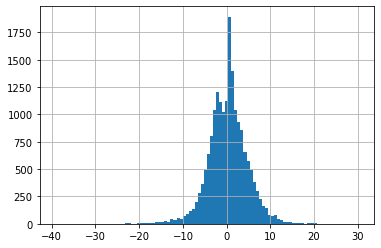

In [54]:
normalized_matrix[normalized_matrix.columns[0]].hist(bins=100)

## Histogram of First Gene

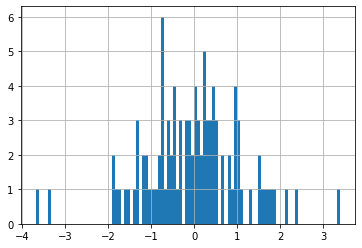

In [55]:
normalized_matrix.loc[normalized_matrix.index[0]].hist(bins=100)

### Save Filtered Matrix

In [56]:
uf.saveData(normalized_matrix, path, 'aba_brain_matrix_filltered', ext='tsv', compression='gzip')

## Create Gene List

In [57]:
gene_list = uf.createGeneList(normalized_matrix, geneid_lookup)

100%|██████████| 18504/18504 [00:00<00:00, 285743.64it/s]


In [58]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1BG-AS1,503538
2,A1CF,29974
3,A2M,2
4,A2ML1,144568


In [59]:
gene_list.shape

(18504, 2)

### Save Gene List

In [60]:
uf.saveData(gene_list, path, 'aba_brain_gene_list', ext='tsv', compression='gzip', index=False)

## Create Attribute List

In [61]:
attribute_list = uf.createAttributeList(normalized_matrix)

In [62]:
attribute_list.head()

""
Attributes
"Crus I, right, lateral hemisphere"
"Crus II, left, lateral hemisphere"
"IV, right, paravermis"
"IX, right, paravermis"
"VI, left, lateral hemisphere"


In [63]:
attribute_list.shape

(100, 0)

### Save Attribute List

In [64]:
uf.saveData(attribute_list, path, 'aba_brain_attribute_list', ext='tsv', compression='gzip')

## Create matrix of Standardized values (values between -1, and 1)

In [65]:
standard_matrix = uf.createStandardizedMatrix(normalized_matrix)

100%|██████████| 18504/18504 [00:01<00:00, 11433.79it/s]


In [66]:
standard_matrix.head()

Attributes,"Crus I, right, lateral hemisphere","Crus II, left, lateral hemisphere","IV, right, paravermis","IX, right, paravermis","VI, left, lateral hemisphere","VIIB, left, paravermis","VIIIA, left, lateral hemisphere","VIIIA, right, lateral hemisphere","angular gyrus, left, inferior bank of gyrus","angular gyrus, left, superior bank of gyrus",...,"superior frontal gyrus, right, medial bank of gyrus","superior parietal lobule, left, inferior bank of gyrus","superior parietal lobule, left, superior bank of gyrus","superior parietal lobule, right, superior bank of gyrus","superior temporal gyrus, left, inferior bank of gyrus","superior temporal gyrus, left, lateral bank of gyrus","superior temporal gyrus, right, inferior bank of gyrus","superior temporal gyrus, right, lateral bank of gyrus","supramarginal gyrus, left, inferior bank of gyrus","supramarginal gyrus, right, inferior bank of gyrus"
0,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.905244,0.674582,0.253923,-0.705279,-0.765399,0.554297,-0.366274,0.574273,-0.066582,-0.645549,...,0.053129,-0.825353,0.634511,0.333865,-0.486062,0.895124,0.413981,-0.745206,0.233778,0.434052
A1BG-AS1,0.889517,0.127689,-0.551405,0.047550,0.468536,-0.072168,0.809347,-0.571329,-0.032255,0.107657,...,-0.052285,-0.192085,0.007631,0.188104,0.668970,0.769248,0.027586,0.548710,0.909569,0.628891
A1CF,0.963939,0.983897,0.863757,0.843776,0.943954,0.903960,0.883910,0.943954,0.102106,0.262709,...,-0.017852,0.763637,0.743606,-0.237638,0.422824,0.603188,-0.317667,-0.277536,0.543096,0.242563
A2M,-0.974840,-0.935010,-0.734956,-0.875009,-0.954908,-0.914989,-0.994577,-0.895071,-0.635202,-0.715045,...,-0.236192,-0.495807,-0.675167,-0.835068,-0.076310,0.424299,-0.336089,-0.795157,-0.615339,0.224047
A2ML1,-0.981550,-0.861870,-0.961737,-0.901831,-0.841839,-0.881885,-0.782007,-0.941729,0.457598,-0.502513,...,0.136723,0.076666,-0.662025,-0.681946,0.237196,-0.701869,-0.083139,-0.602203,-0.163130,-0.482624


## Plot of A Single Celltype, Normalized Value vs. Standardized Value

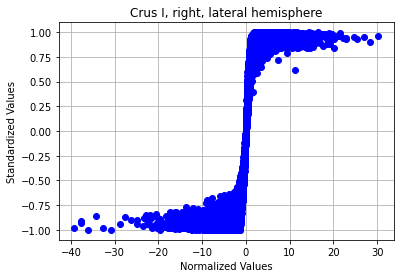

In [67]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

### Save Standardized Matrix

In [68]:
uf.saveData(standard_matrix, path, 'aba_brain_standard_matrix', ext='tsv', compression='gzip')

## Create Tertiary Matrix

In [69]:
tertiary_matrix = uf.createTertiaryMatrix(standard_matrix)

In [70]:
tertiary_matrix.head()

Attributes,"Crus I, right, lateral hemisphere","Crus II, left, lateral hemisphere","IV, right, paravermis","IX, right, paravermis","VI, left, lateral hemisphere","VIIB, left, paravermis","VIIIA, left, lateral hemisphere","VIIIA, right, lateral hemisphere","angular gyrus, left, inferior bank of gyrus","angular gyrus, left, superior bank of gyrus",...,"superior frontal gyrus, right, medial bank of gyrus","superior parietal lobule, left, inferior bank of gyrus","superior parietal lobule, left, superior bank of gyrus","superior parietal lobule, right, superior bank of gyrus","superior temporal gyrus, left, inferior bank of gyrus","superior temporal gyrus, left, lateral bank of gyrus","superior temporal gyrus, right, inferior bank of gyrus","superior temporal gyrus, right, lateral bank of gyrus","supramarginal gyrus, left, inferior bank of gyrus","supramarginal gyrus, right, inferior bank of gyrus"
0,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,-1,0,0,0,-1,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,-1,0,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Save Teriary Matrix

In [71]:
uf.saveData(tertiary_matrix, path, 'aba_brain_tertiary_matrix', ext='tsv', compression='gzip')

# Create Gene and Attribute Set Libraries

In [72]:
uf.createUpGeneSetLib(tertiary_matrix, path, 'aba_brain_gene_up_set')

100%|██████████| 94/94 [00:00<00:00, 5245.53it/s]


In [73]:
uf.createDownGeneSetLib(tertiary_matrix, path, 'aba_brain_gene_down_set')

100%|██████████| 97/97 [00:00<00:00, 2534.70it/s]


In [74]:
uf.createUpAttributeSetLib(tertiary_matrix, path, 'aba_brain_attribute_up_set')

100%|██████████| 18504/18504 [00:00<00:00, 39519.22it/s]


In [75]:
uf.createDownAttributeSetLib(tertiary_matrix, path, 'aba_brain_attribute_down_set')

100%|██████████| 18504/18504 [00:00<00:00, 37942.69it/s]


## Create Attribute Similarity matrix

In [76]:
attribute_similarity_matix = uf.createSimilarityMatrix(normalized_matrix.T, 'cosine')

In [77]:
attribute_similarity_matix.head()

,"Crus I, right, lateral hemisphere","Crus II, left, lateral hemisphere","IV, right, paravermis","IX, right, paravermis","VI, left, lateral hemisphere","VIIB, left, paravermis","VIIIA, left, lateral hemisphere","VIIIA, right, lateral hemisphere","angular gyrus, left, inferior bank of gyrus","angular gyrus, left, superior bank of gyrus",...,"superior frontal gyrus, right, medial bank of gyrus","superior parietal lobule, left, inferior bank of gyrus","superior parietal lobule, left, superior bank of gyrus","superior parietal lobule, right, superior bank of gyrus","superior temporal gyrus, left, inferior bank of gyrus","superior temporal gyrus, left, lateral bank of gyrus","superior temporal gyrus, right, inferior bank of gyrus","superior temporal gyrus, right, lateral bank of gyrus","supramarginal gyrus, left, inferior bank of gyrus","supramarginal gyrus, right, inferior bank of gyrus"
"Crus I, right, lateral hemisphere",1.000000,0.902983,0.898778,0.927314,0.898234,0.892171,0.929411,0.901019,-0.153863,-0.099768,...,-0.262652,0.074959,0.035588,-0.051485,-0.129986,-0.124551,-0.088676,-0.017039,-0.258260,-0.191372
"Crus II, left, lateral hemisphere",0.902983,1.000000,0.944120,0.901061,0.880835,0.940629,0.906612,0.948228,-0.111390,-0.105733,...,-0.312001,-0.027429,0.093104,-0.075529,-0.166402,-0.029248,-0.058562,-0.055497,-0.202751,-0.113098
"IV, right, paravermis",0.898778,0.944120,1.000000,0.902140,0.878785,0.942715,0.898745,0.950010,-0.118852,-0.105499,...,-0.306946,-0.007599,0.078887,-0.051958,-0.181450,-0.057060,-0.060853,-0.093198,-0.224399,-0.118750
"IX, right, paravermis",0.927314,0.901061,0.902140,1.000000,0.895767,0.896922,0.930796,0.905016,-0.157111,-0.101192,...,-0.264512,0.059347,0.022149,-0.062338,-0.121932,-0.101936,-0.099241,-0.025368,-0.245326,-0.172634
"VI, left, lateral hemisphere",0.898234,0.880835,0.878785,0.895767,1.000000,0.864224,0.910772,0.880457,-0.087188,-0.055720,...,-0.266742,-0.022770,0.012406,-0.106723,-0.058827,-0.024051,-0.063304,0.036417,-0.162936,-0.084673


### Save Attribute Similarity Matrix

In [78]:
uf.saveData(attribute_similarity_matix, path, 'aba_brain_attribute_similarity_matix', ext='tsv', compression='gzip')

In [79]:
# net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
# net.cluster()
# net.widget()

## Create Gene Similarity Matrix

In [80]:
gene_similarity_matix = uf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [81]:
gene_similarity_matix.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAA1,AAAS,AACS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
A1BG,1.000000,-0.344228,-0.139713,0.339141,0.134079,0.335085,0.011420,-0.275312,0.312277,-0.283231,...,-0.531905,0.058345,-0.150950,-0.505268,0.080597,-0.077240,-0.512234,-0.261128,0.173534,0.300530
A1BG-AS1,-0.344228,1.000000,0.238388,-0.717680,-0.360688,-0.548683,0.141385,0.053811,-0.397275,0.667642,...,0.728174,0.340482,-0.180077,0.451176,-0.247465,0.073327,0.657462,0.483863,-0.078796,-0.566494
A1CF,-0.139713,0.238388,1.000000,-0.494233,-0.630176,-0.524400,0.057082,-0.066817,0.216844,-0.305185,...,0.235891,-0.442824,0.575485,0.546325,0.596729,0.602610,0.342380,0.236881,0.592840,-0.090851
A2M,0.339141,-0.717680,-0.494233,1.000000,0.552749,0.832766,-0.054331,-0.122058,0.303539,-0.365129,...,-0.793881,0.035305,-0.287148,-0.719147,-0.144332,-0.344735,-0.773315,-0.354753,-0.210743,0.343813
A2ML1,0.134079,-0.360688,-0.630176,0.552749,1.000000,0.621971,-0.117986,0.048287,-0.166571,0.101628,...,-0.345202,0.316840,-0.380944,-0.661542,-0.418955,-0.608539,-0.494716,-0.526943,-0.642362,0.154333


### Save Gene Similarity Matrix

In [82]:
uf.saveData(gene_similarity_matix, path, 'aba_brain_gene_similarity_matix', compression='npz', axes=('gene', 'gene'), symmetric=True, dtype=np.float32)

## Create Gene-Attribute Edge List

In [83]:
uf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, 'aba_brain_gene_attribute_edge_list')

The number of statisticaly relevent gene-attribute associations is: 92242


# Create Downloadable Save File

In [ ]:
shutil.make_archive('output.zip', 'zip', path)

Link to download: [click to download](./output.zip)